In [88]:
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os
import io
from urllib.request import urlopen
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import urllib.request as rq
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from urllib.error import HTTPError

%matplotlib inline

In [7]:
model = load_model('output/bestmodel.h5')
colorLB = pickle.loads(open("output/color_lb.pickle","rb").read())

In [120]:
def get_color_result_from_url(url):

    image,valid = urlToImage(url)
    if valid == -1:
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    image = image.astype("float") / 255.0

    image = img_to_array(image)
    display = image
    image = np.expand_dims(image, axis=0)
    colorProba= model.predict(image)
    colorIdx = colorProba[0].argmax()
    colorLabel = colorLB.classes_[colorIdx]
    plt.figure(figsize=(4,4))
    plt.title(colorLabel)
    plt.imshow(display)
    return colorLabel

    
def urlToImage(url):
    # download image,convert to a NumPy array,and read it into opencv
    try:
        resp = rq.urlopen(url)
    except HTTPError:
        print('HTTP forbidden',url)
        return None,-1
        
    img = np.asarray(bytearray(resp.read()),dtype="uint8")
    img = cv2.imdecode(img,cv2.IMREAD_COLOR)
    
    valid = 1
    if type(img) == type(None):
        valid = -1
        print("URL is not Valid",url)
        
    #return the image
    return img,valid




#     rgb = np.array(color_thief.get_color(quality=1))

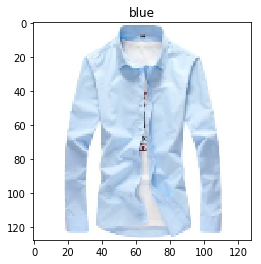

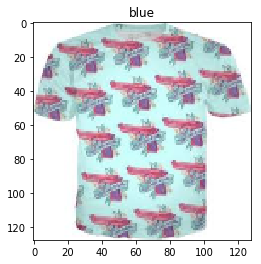

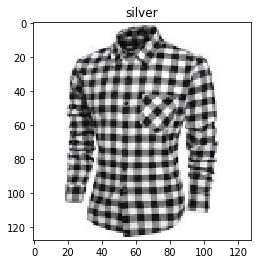

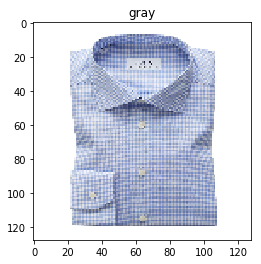

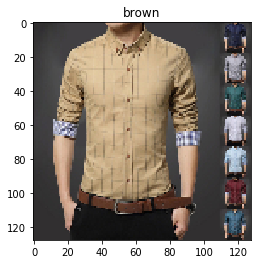

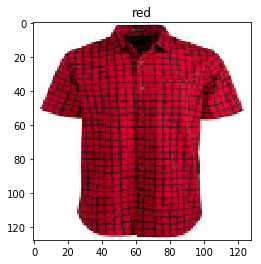

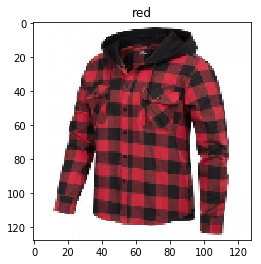

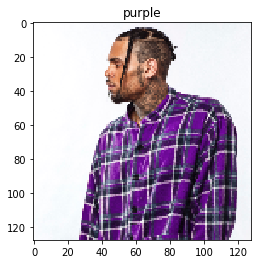

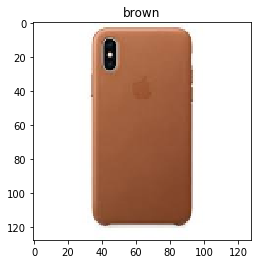

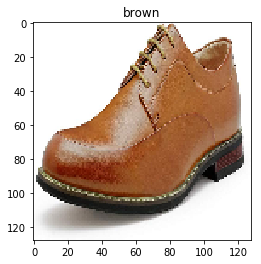

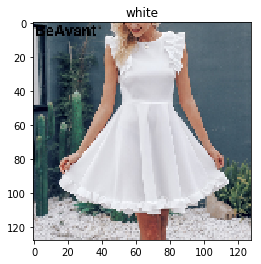

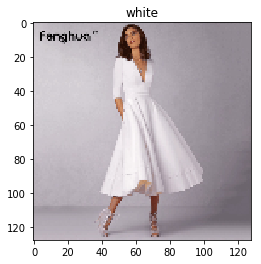

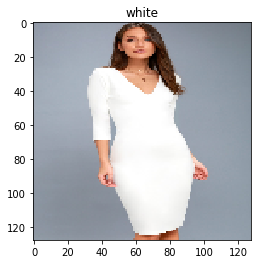

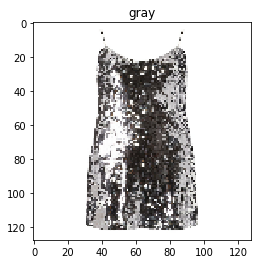

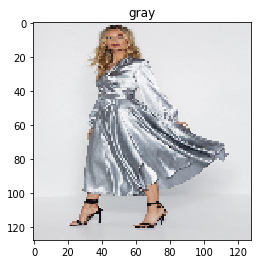

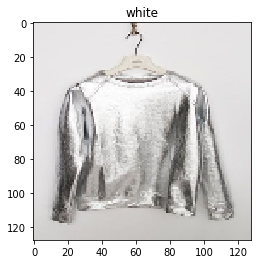

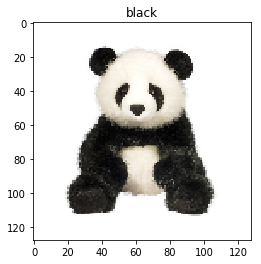

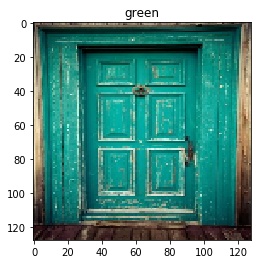

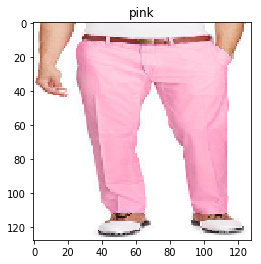

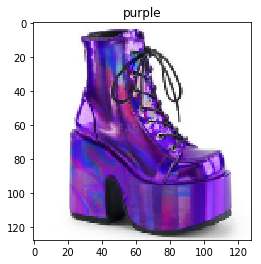

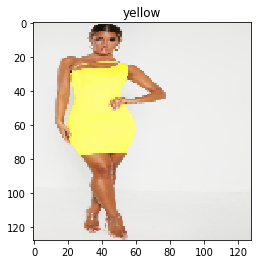

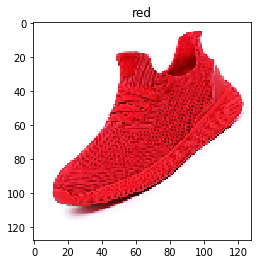

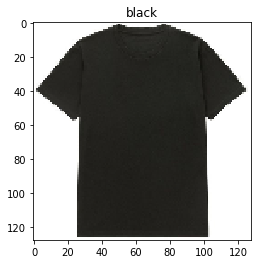

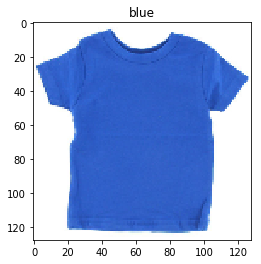

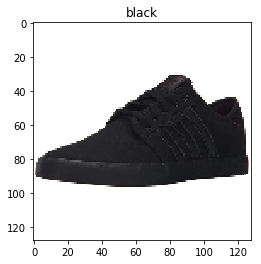

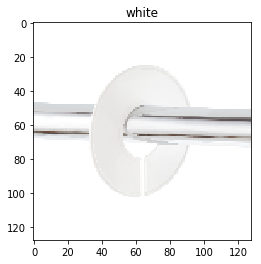

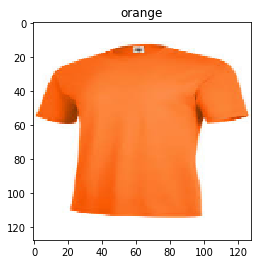

In [126]:
URL= ['https://img1.cfcdn.club/4b/f7/4ba9d98eda7003496b95aba37c1bb2f7_350x350.jpg',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTT6NkN57Lr5khZ46fYCjQpNPTbbeR4UgC6smHQXRnL3NhFGqiG',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTYkgP0n8HaIBtqO6z2RyvEArXKC0iIM7rIwW0Mxv4dJLR-WgV5',
    'https://images.neimanmarcus.com/ca/2/product_assets/N/6/0/C/M/NMN60CM_mz.jpg',
    'https://www.dhresource.com/600x600/f2/albu/g7/M00/DE/71/rBVaSlseAFqAP3dwAAKb7ZcTI9U743.jpg',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTXZ6JF6T_ZQScu4pepoOqU9JN7OOZkGhMPIN5PHQJjGCuFnn_l',
    'https://www.rosendy.com/31929-home_default/men-s-stylish-slim-fit-casual-grid-pattern-long-sleeve-hooded-shirt-tops-red-black-cq188tswr84.jpg',
    'https://pbs.twimg.com/profile_images/1143575751473524736/ei6MOwfP.png',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSTyJdLIH-uNk5fxWM18gPx773cihpMxtDzWBnFWN9dW_txeW_r',
    'https://images-na.ssl-images-amazon.com/images/I/71PhoPL4ufL._AC_UY500_.jpg',
    'https://ae01.alicdn.com/kf/HTB1KABRaOHrK1Rjy0Flq6AsaFXar/BeAvant-Backless-ruffle-women-white-dress-casual-Vestidos-elegant-pleated-summer-dress-2019-High-waist-sexy.jpg',
    'https://ae01.alicdn.com/kf/HTB12X8KajDuK1RjSszdq6xGLpXav/Vintage-Spring-Winter-Dress-Women-2019-Casual-Plus-Size-Elegant-Ball-Gown-Party-Dresses-Female-Sexy.jpg',
    'https://www.lulus.com/images/product/xlarge/2869200_570532.jpg',
    'https://images.dorothyperkins.com/i/DorothyPerkins/DP97282900_F_1.jpg?$Zoom$',
    'https://media.nastygal.com/i/nastygal/agg82661_silver_xl?pdp.template',
    'https://i.pinimg.com/originals/fa/e9/16/fae916c848e670f7993d1c0a42fb607d.jpg',
    'https://douglascuddletoy.com/wp-content/uploads/2019/04/308-Emmett.jpg',
    'https://vignette.wikia.nocookie.net/literature/images/f/f6/LaVerdaPorto.jpg/revision/latest/scale-to-width-down/340?cb=20150420131448',
    'https://cdn.lookastic.com/pink-pants/ralph-lauren-polo-golf-tailored-fit-stretch-pant-original-1034108.jpg',
    'https://i.ebayimg.com/images/g/ChEAAOSwRXRZRxRn/s-l300.jpg',
    'https://cdn-img.prettylittlething.com/4/4/2/b/442b0065d11b3617e535f88cd3528d496cb4b89e_cmc8808_4.jpg?imwidth=400',
    'https://m.media-amazon.com/images/I/71RV-BW1vqL._SR500,500_.jpg',
    'https://hips.hearstapps.com/vader-prod.s3.amazonaws.com/1544480311-goods-09-408964-1544480302.jpg?crop=1xw:1xh;center,top&resize=480:*',
      'https://imgprod65.hobbylobby.com/sys-master/migrated/ha0/h88/h00/9031221936158/850255[5].jpg',
      "https://m.media-amazon.com/images/I/81IVR+OGZVL._SR500,500_.jpg",
      'https://images.containerstore.com/catalogimages/293087/628020ClosetRodDividerBlank_1200.jpg',
      'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBw8PEA8PDw8NDw0ODw0NDQ8NDQ8NDw8NFREWFhURFRMYHSggGBolHRUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OFxAQFy0fHh0tKy0rKy4tKy0tKy0tLS0tLS0rLSstLS0tLS0rLS8rLS0uLi4tLS0tLS0tNS0tLS0tLf/AABEIARMAtwMBEQACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAAAgMBBAYFB//EAEIQAAICAQEEBQYKCQQDAAAAAAABAgMRBAYSITEFQVFxgRMiYZGhwQdCUlNicpKxstEjMjNjc4KiwvAUFkPiJIPh/8QAGgEBAAIDAQAAAAAAAAAAAAAAAAECAwQFBv/EADURAQABAgMEBgoCAwEBAAAAAAABAgMEBRESITFRQWFxobHRFSIjMlKBkcHh8BNCFDPxNHL/2gAMAwEAAhEDEQA/APuIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGB4mv2s0FDanqISmuDjVm1p9j3eC8TVuYyzRxq+m9uWsBiLnCnTt3eLzq9t4WuS0+l1V27jeaiklnOM4zjkzXjMYqmYt0TU2pyqaIibt2mnX96kNXtlbVFTlopRhKW5GU71hyw3jhH0P1FLuYXbcbVVrSOufwyWsrs3atmm/Ez1R+WmvhEw/O0vD6N/H2xMMZxv30d/4Z5yHduud35b3R+3+ktnGE4XUyk1FOcVKGX6Yvh6jat5laq46w07uUXqPdmKnV12RklKLUovinFpprvOhExMaw5cxNM6TGiRKAAAAAAAAAAAAAAAAB4HTm1mm0uYp+WuXDydbWFLslLkva/QaOIx9qzu4zyj7ujhcsvX/W02aec/aHzvaTaHU6p7s5uNLXGqtuMOfJ9cvE4t3GXL3vTpHLoehs5fasabMazznj+HjU1xXKMV4GpVVM9Ldopjk9/oOxKvUQd1dLmqseUxuz3XLMX1449R0csu0UTXtzpw4uVnFmu5FvYpmdNeEc9ErnFaZwepjbPylcowhUqlwjJObSclnjj9Z8PZs5hiLVy1MUzGusNTLMNftX4qrpnTSd7zdzJw9Ho9VlVKi8/G+4tEaKVVat/R9LX0PNVsoejOYvvi+Bmt4i5b9yrT95Ne7hLV2PXp1/ebo+jtt5LC1FSl9Org/svg/WdGzm0xuuU69ceTk38kid9qrTqnzdNoOnNNfhV2x3n8SfmT9T5+B07WLs3fdq38uEuRewV+z71O7nxh6JstUAAAAAAAAAAMNgeH0ntVpqMxjJ3WL4tXGKfpny9WTQvZjZt7onanq83Sw+V37u+Y2Y6/Jx/S+02p1GY73kqn8SptNr6Uub9hx7+PvXd2uzHKPN3cNllixv02p5z9oeDKk0tHR2kXSnzRGidSOmROiNrRONHpGyTWsVSJ0V2pTUSVdRoJ1VuJGi2rG6yE6gHp6Dp7VUcIXS3V8Sfnx7sPl4Gzaxd617tXyne072AsXfeo3843S6To/bhPCvqa7Z1cV9l8fazpWs2jhcp+ceTk38kmN9qr5T5um0HSdGoWarIz7Vyku+L4o6drEW7sa0VauRew12zOlynT95tszMAAAAAAHh9NbTUabMF+luXxIPhF/Sl1d3M0cTj7dn1Y31cvN0cLlt2/60+rTz8ocT0ttBqNTlSnu1/NwzGOPT2+JxL+Mu3vendyjh+XocNgLNjfTGs854/h5Rqt1lICcUSpKe6SjU3ENDVndJRqzgBgBug1Y3SDVjcGidWNwaJ1RdZGidoUBobSVVkoSUoScZx4qUW014k0zNM6xOkq1U01xs1RrEu/2V6feoXkrseWisqSwlZFejtO/gcZN31K/ejveZzHARYnbo92e78OiOk5QAAAcntntDOlrT0vFko71k1zhF8orsb7Tk5jjKrfs6OPTPJ28qy+m77W5wjhHP8ADg8nBel0AMolCcUSrKyMSVdU1ElXVnAGMAZwBlII1ZwBjASxgDKgEam6DVFhKLiQnVsaS+VU4zg8Sg1KJeiuaKoqp4wx3bdNymaauEvqOkvVtcLI8pxUl4rkert1xXTFUdLxly3NuuaJ6FxdQAhbYoxlKTxGKcpPsSWWRVMUxMz0JppmqYiOMvj+u1bvtstl+tObl3J8l4LC8Dx9y5Nyua56Xu7NqLVumiOiFOCjIyiUJJBC6ES0KStSJU1SwSgwQamAaiRJqkkEMNA1N0GrOAaothMQiyFkG+rrCdE0ghkId1sXqd6hwfOqbS+rLivbk7+WXNq1NPKXms1t7N6Kvih0B0XMAPB201nktLNJ+dc1Uu58ZexNeJoZld2LEx8W7z7nSyqz/JiInop3+T5fGXnd6PMxxewngtySqkkShOCJhWWxBFmOZWYJU1AM4AAZSCGcEjOCdAwQIOJCWVAnQ1VXS7OfUVlamEIRx6e19oWmViCoSOm2GuxbZD5cFJd8X/2OnldeldVPOPBx83o1t01cp8f+O0O48+AcD8Ieq3raqlyrg5v60n+UV6zgZtc1uU0co8f+PTZHa0t1V850+n/XF2vDTOR0u70L4MmFZhOJZWV9aLQpMtiKJYpTSLKs4AxgDOAMolCSRKNWcEmpgaGqLISjJlZlMNTyilJ46uBTXVm2dIWxRKkylglGowPU2Zu3NVU+qTcH/Mml7cG1gatm/T9GlmFG1h6urf8AR9FPSvKgHyXaLVeV1V885XlJRj9WPmr7jyWLufyXq6uvw3PbYG1/Hh6KerX673j6jka3S3ehRVqccHy5Z7C2zyU246W/VLIgqblZeGGpfBFmOVmC2irASEAiRJEwhJEqskiLZEkKbJFJZIhr228Hjnh478FdWTZaPRcsxT+VxXcV00nReZ1piXqRLsMphVhhKels3Jwn8mUZep5LUVbNUVclblO1TNPOH1OLyk+p8T1sPFzGijpHUeSpts+RXOfilwMd6v8Ajt1VcollsW/5LlNHOYh8db63z6zx3a94ouIlaODy73j/ADqM9O9rVzo3eibcprmk1juK1xpK1qrWmep7NTEIqbEGWhilYWVYYGCEskiSJhVIlDDZGqdEGyNUqrCsr0tSbKSzRDT0E0lGK5RUV7CJn1pWimNiIjoetBl2CYWEqMMJRQS+mdDXb+npl1uuCfelh+1HqMNVtWqJ6nkMVRsXq465eXtzqvJ6SUeu2cILuT3n+H2mrmdzZsafFMR925lFrbxMT8MTP2fNjzj1ii4rK8cHkatmxbad2ToK/Fzh1Si34r/GZL1PqxPJjw9frzTzdRSYIbFS+tloY5WkqgAAShlEwSmSqw0CJVSRSV4YIS09ZHCbRSqGe3LnejtT584vqk2u7Jku0boqY7FzWqqmXTaeWUUiVq43tlFmGRgQyFnebHXb2m3c8a5yjjsT873s9BltetnTlLzWaUbN/XnEeTnvhEum7aoYkq4Qck2moynJ8cPk8JL1nPzauqblNOm6I73TyOimLdVWu+Z+kQ5LJyncU3vgVlaODxdc+JtWoaN+WOgaJTvW6s7kbLJeiEYvLM1yJmidGvZmIuRM/urrK+RqQ3pW1slSpeWURbAygJEoYQglMsqyBBlZWhW0VWUalcGVq4MlHFxW9uan0OTT7mbOm1aauuxiHV6GzgalMt+5HS31IyNeYZYQpt1FcP1pwj3ySfqGiXV/B9qN93OClKpqC8puyUN9N+am+fPq7Dr5XFUTVu3To4mb7MxRv3xruddqNPCyLhZGM4PnGSTR1q6Ka42ao1hxqLlVFW1TOkuS6X2IUsy001F8/J2NuPhLmvHJyL+VRO+1OnVPm7eGzqY3Xo1648nEdMdF6nTZ8rVOC+VjMH/MuBybmHuWp9enTwdy1irV6n2dWvV0/Ry2rsyzPbjSGrdqmZdZ8HHRUprWahxl5NaPUVRljzfKSS4LteEbdmiaqbm7dsz9Wlfriibe/fNVO7q1XI5bsLKSYVqXssxoyZCYZgyYRKZZCKfEqlYXUYyEsMhLDKpUWorK9LnujOjf9R0nRU1mM7q3NPinXHzpL1Jm5hI2tmnraeOq2Nqvqe/rujpU6m6pRk1GyW6oxb8x8Y8F6GjWvWpovVURHCW5Yv03bFFczxjv6W3R0bqZ8IUW+MJJe0tTh71XCifow14mxT71cfVt1bG6279pOFMOvMsvHdH8zZt5bfqn1tKY/eTWuZthqI9WJqn96Ze30XsBoqmpWqWomuP6ThXn6i5+LZ0rOXW6N9XrT3OVfza7c3URFMd/1dVXXGKUYxUYxWIxilFJdiSN+IiI0hzJmZnWUiUAGGgNK3ofSze9PTaaUu2VFcn62jHNm3PGmPozRiLscK5+srNbCMKLVGKjGNVmIxSikt18EiLsRFurTlJamartMzx1jxfKJM8k9tCzTloUrXyLMauTKrQnWTCJWMsqh1lUrC6rASAYZEiuaKyvDf2D6PUtdO75qmWPrSaS9m8b+V0zN2eqHPzmqIsU86p8H0k9A8wAAAAAAAAANXpV4ov/AINv4GYsR/qr7J8GbDf7qO2PF8lmzyT28NjTloY61siVIVyIWhZWTCtSxlpVVrmVWWIvCoAIACEyJWh0/wAH9XDUz7ZVwXgm/edbKad1dXZDi51Xvt09suvOw4YAAAAAAAAA0enHjS6l/uLfwM18XOlivsnwbGE337f/ANR4vk7PKPbQ2qFwLwxVrJMlSFU2QyQuqJhjqTZaUIIqlYiyowMEJAMSEjs9h68aeT+VbN+pRXuO5ldOlmZ5y89m9Wt+I5RH3dEdJywAAAAAAAAB520bxpNT/BmvYauN/wDPc7JbWB/9Fvth8pb4nlntehuVci8MFTMmCFUnxIXhsVci0MU8UpEyhBEJWJkoGBjIDIGQO92Ur3dJV6XZL1zZ6HL6dLFPz8XmMyq1xFXy8Hrm60QAAAAAAAAB5O1UsaPUfUS9ckjUx06YevsbuXRriaO18tXM8u9m3Ici8MEsyYIUN8Sq/Q26y8MMszYkhBMJlYiVRgYIGMhKcS0Ky+j9DV7unpX7uD9az7z02Gp2bVEdUPJ4qravVz1y3TO1wAAAAAAAAB4W2s8aK36Tqj/WjQzKdMPV8vF0cpjXFU/PwfNIczzUPXy3ImRglGbEphSuZVfobcC7DLMmCEEQmViZKqTZKEGQmGEyErYl4Vl9O0a/R1/Uh+FHqrfuR2PG3ffq7ZXF1AAAAAAAAABzHwg2Y0sV8u6C8FGT9xzM2q0sxHOYdfJadcRM8on7PntR56Hqam6jIwKrWRK8K6+ZEJng3Yl2GWJAhFELJolSUiUIyIWhDJCy2D4MtDHPF9P0Ms1VPtrg/wClHq7U60Uz1Q8dejS5VHXK8uxgAAAAAAAADjfhIs8zTx7Z2S9UUv7jjZxV6tFPXP73u9kVPr3KuqP3ucTUcWHoam1kuxKLGVlkiCrmRBVwbkTIwSxJkEIphZLIQkmSqxIhaFUgtC2lkwpVD6Rs9bv6al9kd37La9x6bB1bVmmXksdTs3646/F6JstUAAAAAAAAAcD8JFmbaIfJrnL7Usf2nBzer2lEdUvTZFT7OurnMd0fly1Zyodmpe2WY2vNlZZISo5iEV8G6jIwyjIghBBaUwhJEqyxIhMKphaE6nxEIqh32xtudO4/Isl6nh/megy2rW1pyl5nNadL2vOHvHQcwAAAAAAAAAfN/hAnnVpfJprXtkzzeaz7f5R93rMljTDdsz9nO1M58OpVC+T4FmOFEmVllhPT8yaVa+DcRdgRkwmEUQtKRKEkwhkIVTC0EAS7bYefC6PphL7ztZXO6qOx57N430T2upOs4wAAAAAAAAA+X7cTzrbfoxqj/Qn7zzGZVa4irq08HsMop0wtPXr4vCqfE0YdKqF8nwLMcKJMqyLdMy1KlbcRdhRkEwhEhMrCUCCEshCuYWhGLIhMuw2Gl59q7a4v1S/+nXyufWq7HCziPUpnrdidpwQAAAAAAAAB8l2qs3tXqH+8cfspL3HksbOt+vte3y6nTDW+x5Nb4mtDdlc5cC2qmipsqtotofEtSrW3EzIwIyZEpiEYsQmYWEqsNkJSiyVZRmEwiiEur2Gl+mmv3L/HE6mVz7Wez7w42cR7KO37S7Y7rzoAAAAAAAAA+NdNWqd98k8qV10k11pzeDxt+rau1zzmfF73C07NmiJ6IjwaVZihnWSZaUQhkosuoL0qVtrJkYEJELQxF8SITK9F2NhoAmCSZEphWmQmXU7Dv/yH/Cn+KJ08s/3T2T9nHzePYx2x93dHfebAAAAAAAAI2JuLxzw8d+CJ4bk06axq+O9IdEamhvytVkUvjbu9B/zLgeQu4e7b9+mXu7OKs3Y9SuJ8fo0YP0eowtiUpS/zAlEK94jROrZ05alStsl2JhhKBCV0JFoUmEyUIshLDYFWeJCzqNh5L/Uf+qf3o6WWT7b5T9nIzePYfOPu709A8yAAAAAAAAAAGlqeiNNb+0opk+11x3vXzMFeGtV+9RE/JsW8Xft+7XMfN5l+xuhlyrnD6lkvfk1qssw89Gnzlt0Zviqf7a9sQ87U7AUv9nfbF/TjGxezBr15Pb/rVMd7boz67Hv0RPZrHm0VsHcuV1LXpjOP5mD0Rc6Ko72x6ctTxonuWLYi/wCco/r/ACJ9E3PijvV9NWvhnuRlsRqOqzTvxmv7SJyq78Ud6Yzqz8M93m1rNjNWuSpl9W1r70jHOWX+r6/hlpzjDzzj5K/9ra1f8We6yt/eyvo/ER/Xvhf0phZ/t3SPZvWfMS8J1/mR/g4j4O+PM9JYb4+6fJF7N6z5if24fmR/g4j4J7vNb0jhvjj6T5Mf7b1nzE/tw/Mf4OI+Ce7zPSOG+OPpPkzHZXWv/hx32QXvJjL8RP8AXvhE5phY/v3T5Og2Z2ev09qtsdaSjJbqm5S4ruwdDBYK5aubdWjl5hmFq9b2KNXWHWcUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/9k='
     ]

for u in URL:
    get_color_result_from_url(u)

In [112]:
colorLB.classes_

array(['black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink',
       'purple', 'red', 'silver', 'white', 'yellow'], dtype='<U6')